In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib as plt
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

# Jain Data sets

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


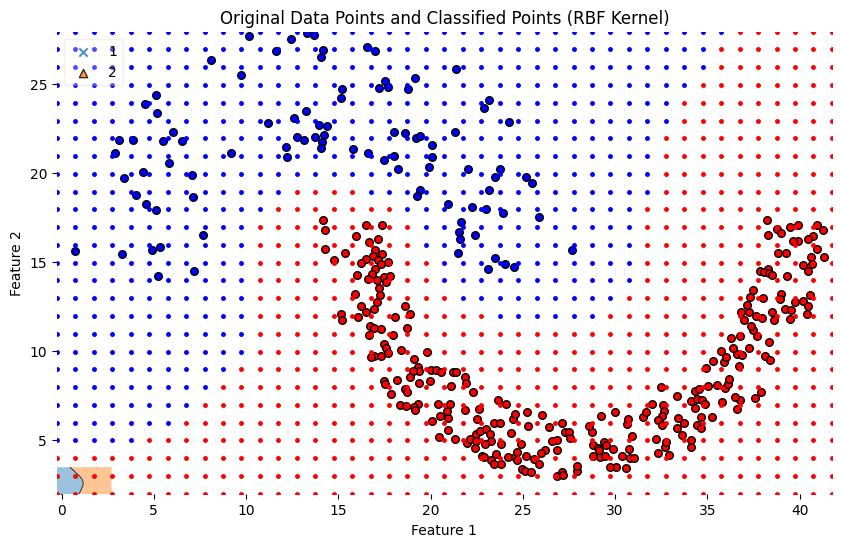

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions  # Import plot_decision_regions from mlxtend

# Load the data
df4 = pd.read_csv('/content/Jain.txt', delimiter='\t', skiprows=7)

# Rename columns for clarity
df4.rename(columns={'0.85': 'Feature 1', '17.45': 'Feature 2', '2': 'Class'}, inplace=True)

# Extract features and target variable
X4 = df4[['Feature 1', 'Feature 2']].values
y4 = df4['Class'].values

# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled4 = scaler.fit_transform(X_train4)
X_test_scaled4 = scaler.transform(X_test4)

# Define the mesh grid
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1

# Define the mesh grid with reduced size
step_size = 1  # Adjust this value to reduce the size further if needed
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Reshape the mesh grid to fit the SVM model
mesh_grid = np.c_[xx.ravel(), yy.ravel()]

# Scale the features for the mesh grid
mesh_grid_scaled = scaler.transform(mesh_grid)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=2, C=2)  # You can adjust gamma, coef0, and C as needed
svm_model.fit(X_train_scaled4, y_train4)

# Predict the class for each point in the mesh grid
Z = svm_model.predict(mesh_grid_scaled)

# Reshape the predictions to match the mesh grid shape
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
colors = ['red', 'blue']
color_map = {label: color for label, color in zip(np.unique(y_train4), colors)}

# Plot the decision regions
plot_decision_regions(X=X_train_scaled4, y=y_train4, clf=svm_model, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 100, 'label': 'Test data'})

# Plot the original data points
for idx, label in enumerate(np.unique(y4)):
    plt.scatter(X4[y4 == label, 0], X4[y4 == label, 1], c=color_map[label], label=f'Class {label}', edgecolors='k', s=30)

# Plot the classified points with different colors
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([[xx[i, j], yy[i, j]]])
        point_scaled = scaler.transform(point)
        prediction = svm_model.predict(point_scaled)
        plt.plot(xx[i, j], yy[i, j], marker='.', markersize=5, c=color_map[prediction[0]])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Original Data Points and Classified Points (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



   0.85  17.45  2
0  0.75  15.60  2
1  3.30  15.45  2
2  5.25  14.20  2
3  4.90  15.65  2
4  5.35  15.85  2
Accuracy: 0.9333333333333333


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

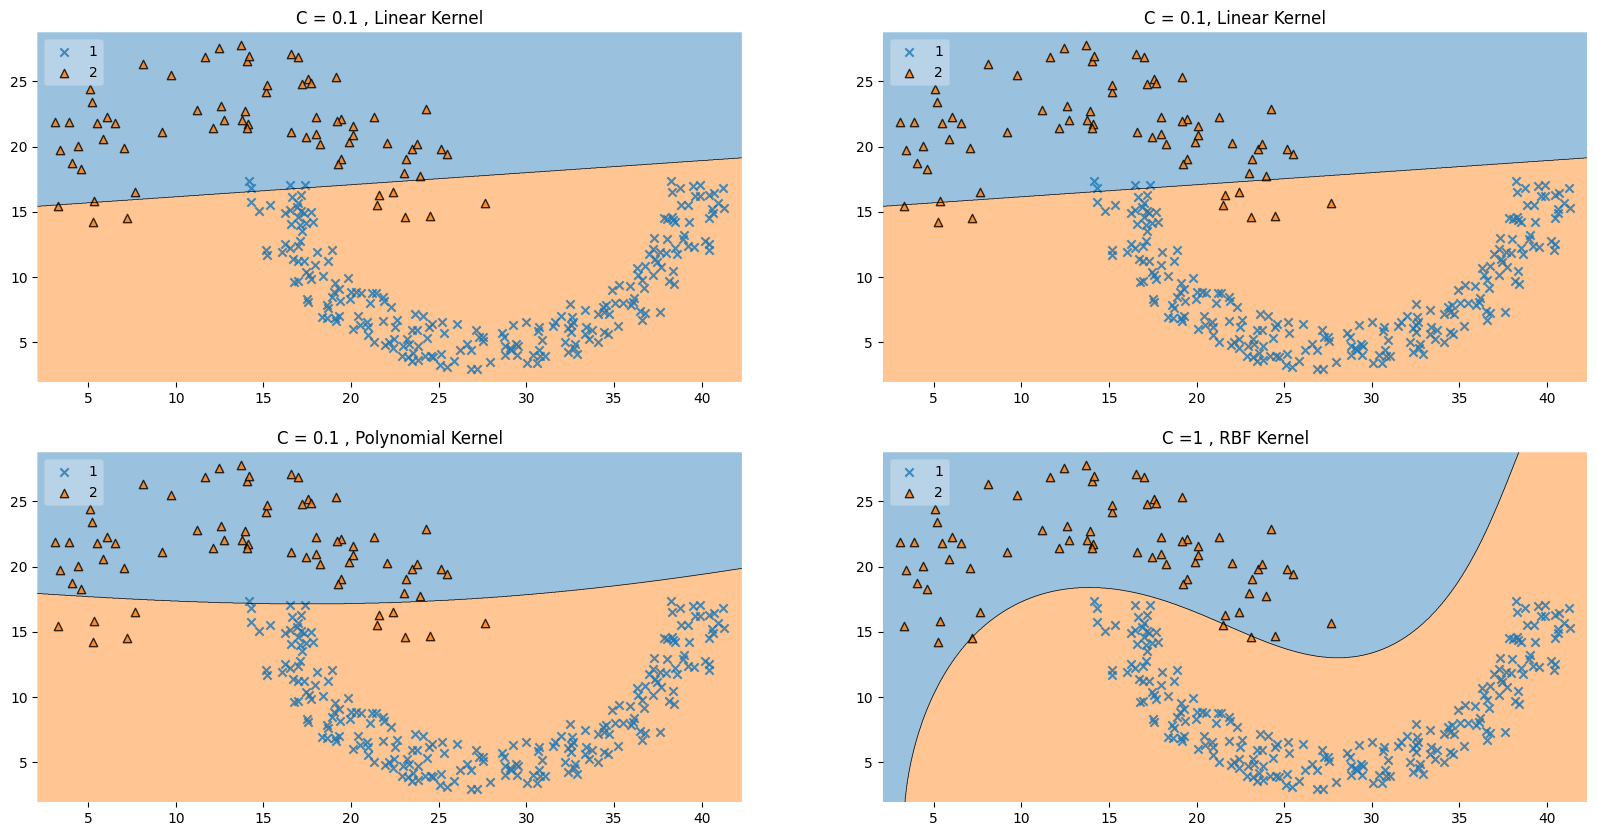

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

# Read the text file as CSV, skipping the first 7 lines and using tab as the delimiter
df = pd.read_csv('/content/Jain.txt', delimiter='\t', skiprows=7)



# Rename columns for clarity
df.rename(columns={'0.85': 'Feature 1', '17.45': 'Feature 2', '2': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

gs = gridspec.GridSpec(2, 2)

plt.rcParams['figure.figsize'] = (20, 10)

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

labels = ['C = 0.1 , Linear Kernel' , 'C = 0.1, Linear Kernel', 'C = 0.1 , Polynomial Kernel'  ,'C =1 , RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 10, Linear Kernel'),
               (clf3, 'C = 20, Polynomial Kernel'), (clf4, 'C = 20, RBF Kernel')]



# Compound data set

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

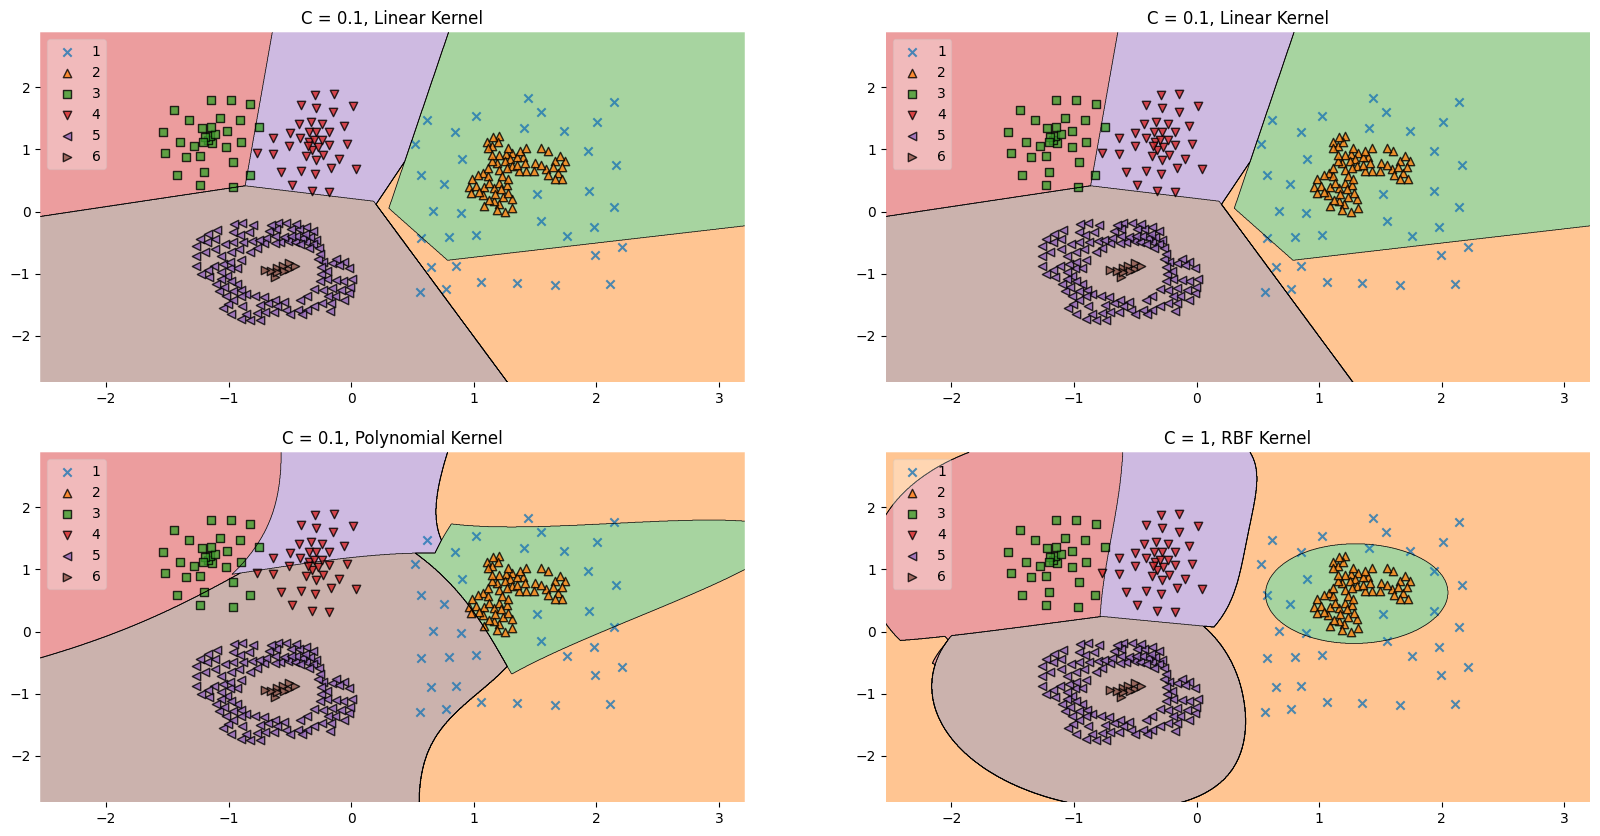

Accuracy for C = 0.1, Linear Kernel: 0.8125
Accuracy for C = 0.1, Linear Kernel: 0.8125
Accuracy for C = 0.1, Polynomial Kernel: 0.75
Accuracy for C = 1, RBF Kernel: 0.9


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec

# Load the data
df = pd.read_csv('/content/Compound.txt', delimiter='\t', skiprows=7)

# Rename columns for clarity
df.rename(columns={'26.75': 'Feature 1', '22.15': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
labels = ['C = 0.1, Linear Kernel', 'C = 0.1, Linear Kernel', 'C = 0.1, Polynomial Kernel', 'C = 1, RBF Kernel']

gs = gridspec.GridSpec(2, 2)

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()

# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 0.1, Linear Kernel'),
               (clf3, 'C = 0.1, Polynomial Kernel'), (clf4, 'C = 1, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


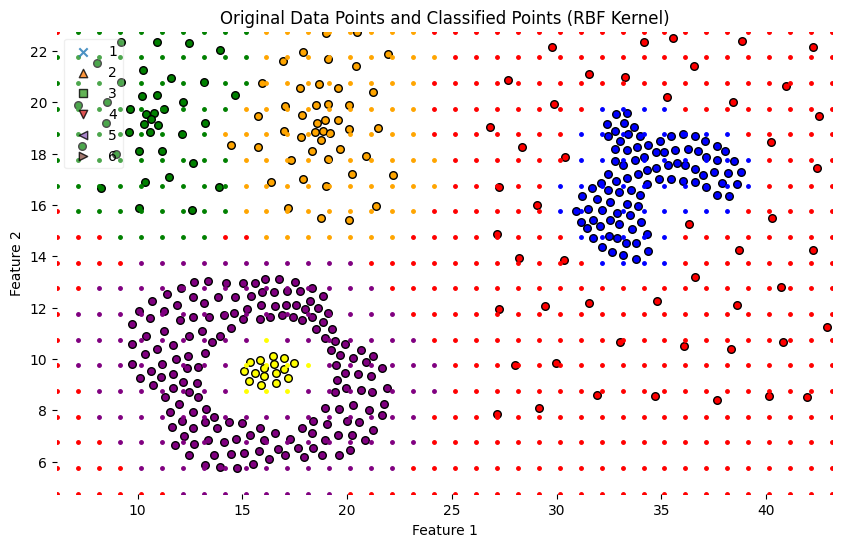

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('/content/Compound.txt', delimiter='\t', skiprows=7)

# Rename columns for clarity
df.rename(columns={'26.75': 'Feature 1', '22.15': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Define the mesh grid with reduced size
step_size = 1  # Adjust this value to reduce the size further if needed
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Reshape the mesh grid to fit the SVM model
mesh_grid = np.c_[xx.ravel(), yy.ravel()]

# Scale the features for the mesh grid
mesh_grid_scaled = scaler.transform(mesh_grid)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=10, C=1)  # Y0u can adjust gamma, coef0, and C as needed
svm_model.fit(X_train_scaled, y_train)

# Predict the class for each point in the mesh grid
Z = svm_model.predict(mesh_grid_scaled)

# Reshape the predictions to match the mesh grid shape
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
# plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
# Assign high-contrast colors to different classes
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train), colors)}

# Plot the original data points
for idx, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color_map[label], label=f'Class {label}', edgecolors='k', s=30)

# Plot the classified points with different colors
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([[xx[i, j], yy[i, j]]])
        point_scaled = scaler.transform(point)
        prediction = svm_model.predict(point_scaled)
        plt.plot(xx[i, j], yy[i, j], marker='.', markersize=5, c=color_map[prediction[0]])


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Original Data Points and Classified Points (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# *Aggregation*

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

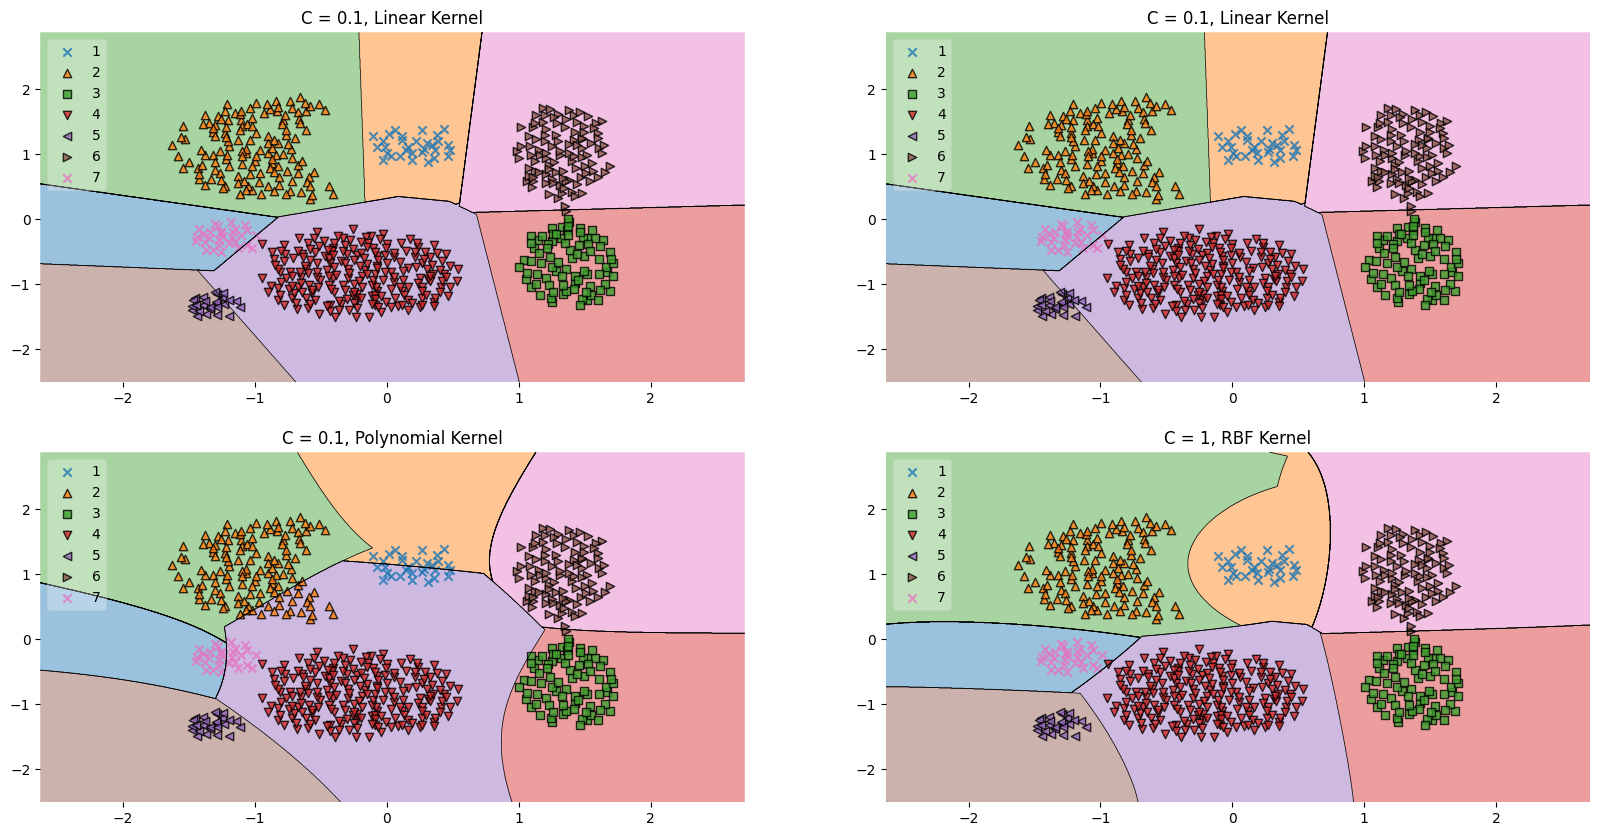

Accuracy for C = 0.1, Linear Kernel: 0.9683544303797469
Accuracy for C = 0.1, Linear Kernel: 0.9683544303797469
Accuracy for C = 0.1, Polynomial Kernel: 0.9113924050632911
Accuracy for C = 0.1, RBF Kernel: 0.9936708860759493


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec
df = pd.read_csv('/content/Aggregation.txt', delimiter='\t', skiprows=7)
# Load the data
df.rename(columns={'15.55': 'Feature 1', '28.65': 'Feature 2', '2': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
labels = ['C = 0.1, Linear Kernel', 'C = 0.1, Linear Kernel', 'C = 0.1, Polynomial Kernel', 'C = 1, RBF Kernel']

gs = gridspec.GridSpec(2, 2)

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()
# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 0.1, Linear Kernel'),
               (clf3, 'C = 0.1, Polynomial Kernel'), (clf4, 'C = 0.1, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


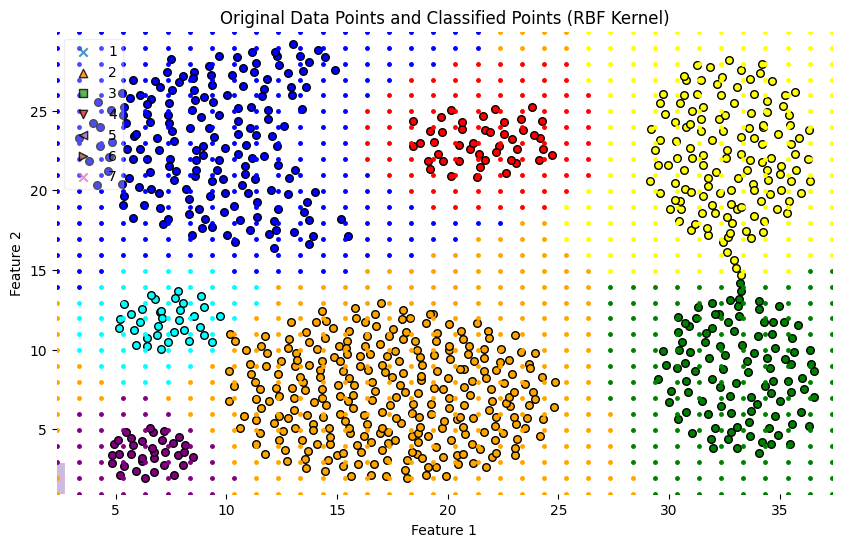

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions  # Import plot_decision_regions from mlxtend

# Load the data
df = pd.read_csv('/content/Aggregation.txt', delimiter='\t', skiprows=7)
# Rename columns for clarity
df.rename(columns={'15.55': 'Feature 1', '28.65': 'Feature 2', '2': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Define the mesh grid with reduced size
step_size = 1  # Adjust this value to reduce the size further if needed
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Reshape the mesh grid to fit the SVM model
mesh_grid = np.c_[xx.ravel(), yy.ravel()]

# Scale the features for the mesh grid
mesh_grid_scaled = scaler.transform(mesh_grid)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=5, C=5)  # You can adjust gamma, coef0, and C as needed
svm_model.fit(X_train_scaled, y_train)

# Predict the class for each point in the mesh grid
Z = svm_model.predict(mesh_grid_scaled)

# Reshape the predictions to match the mesh grid shape
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))

# Plot the decision regions
plot_decision_regions(X=X_train_scaled, y=y_train, clf=svm_model, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 100, 'label': 'Test data'})

# Assign high-contrast colors to different classes
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train), colors)}

# Plot the original data points
for idx, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color_map[label], label=f'Class {label}', edgecolors='k', s=30)

# Plot the classified points with different colors
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([[xx[i, j], yy[i, j]]])
        point_scaled = scaler.transform(point)
        prediction = svm_model.predict(point_scaled)
        plt.plot(xx[i, j], yy[i, j], marker='.', markersize=5, c=color_map[prediction[0]])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Original Data Points and Classified Points (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.legend()
plt.show()


# Pathbased

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

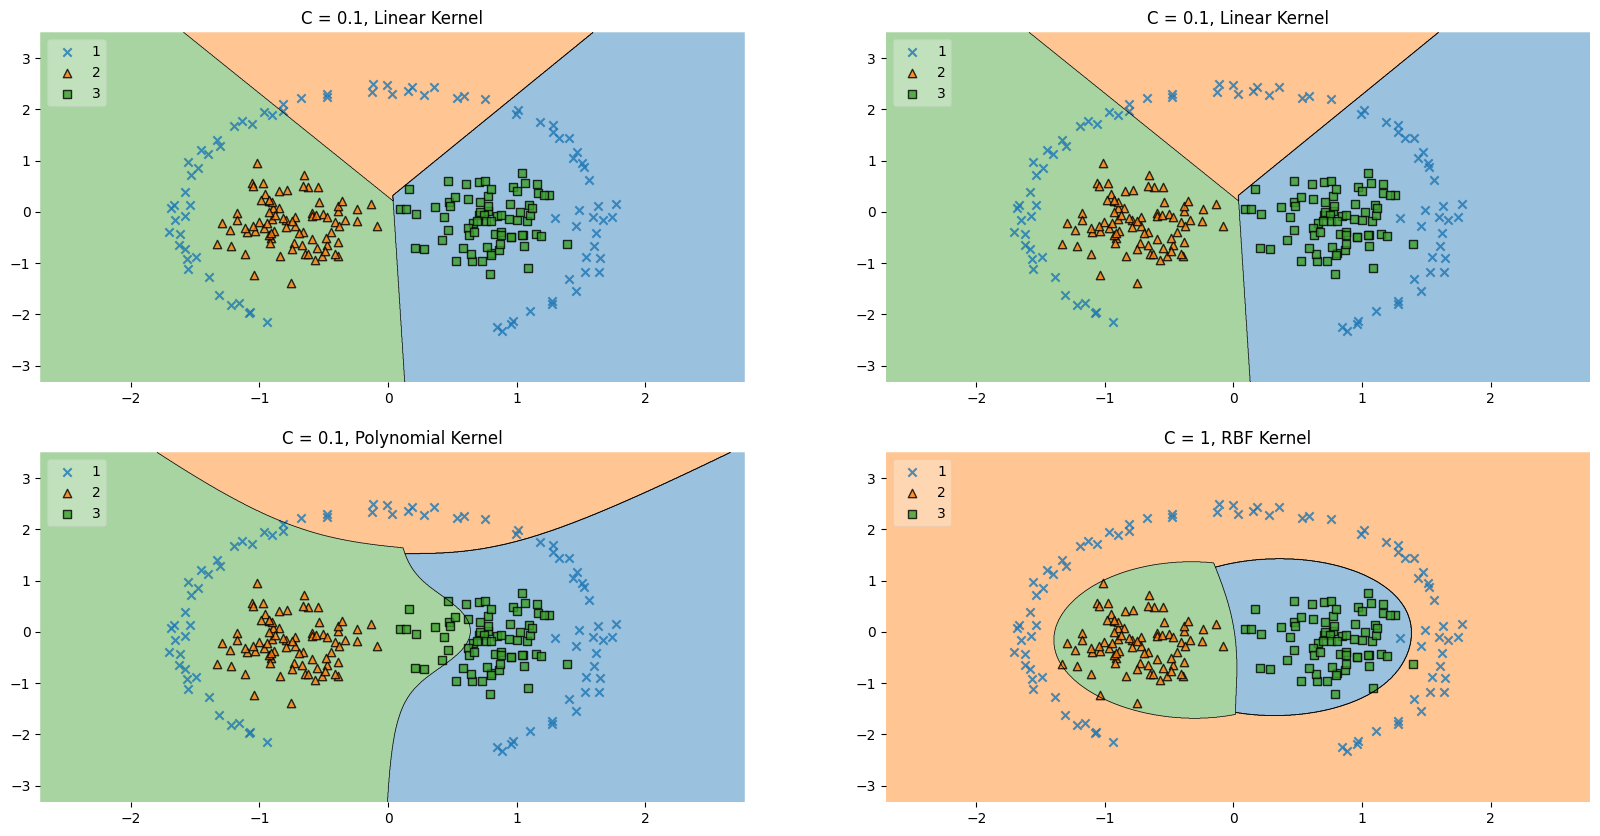

Accuracy for C = 0.1, Linear Kernel: 0.65
Accuracy for C = 0.1, Linear Kernel: 0.65
Accuracy for C = 0.1, Polynomial Kernel: 0.5666666666666667
Accuracy for C = 1, RBF Kernel: 0.9833333333333333


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec
df = pd.read_csv('/content/Pathbased.txt', delimiter='\t', skiprows=7)
# Load the data
df.rename(columns={'11.25': 'Feature 1', '5.05': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
labels = ['C = 0.1, Linear Kernel', 'C = 0.1, Linear Kernel', 'C = 0.1, Polynomial Kernel', 'C = 1, RBF Kernel']

gs = gridspec.GridSpec(2, 2)

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()
# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 0.1, Linear Kernel'),
               (clf3, 'C = 0.1, Polynomial Kernel'), (clf4, 'C = 1, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


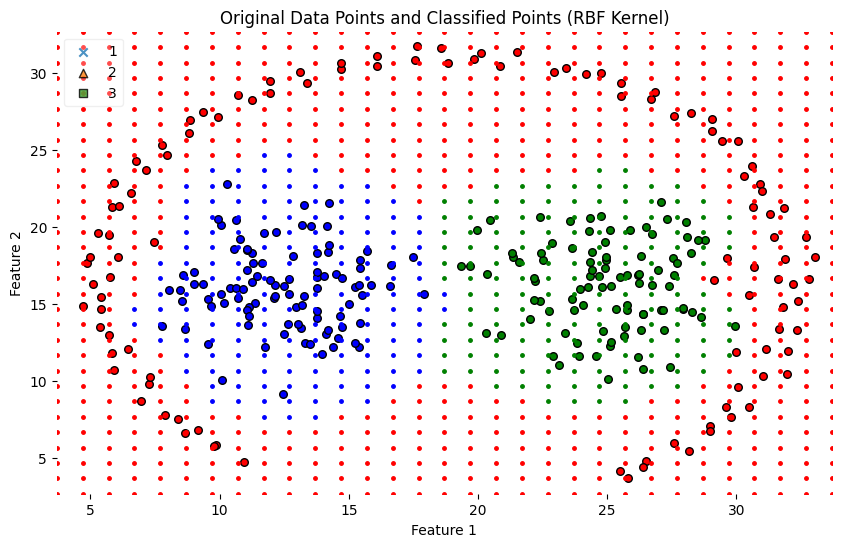

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions  # Import plot_decision_regions from mlxtend

# Load the data
df = pd.read_csv('/content/Pathbased.txt', delimiter='\t', skiprows=7)
# Load the data
df.rename(columns={'11.25': 'Feature 1', '5.05': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Define the mesh grid with reduced size
step_size = 1  # Adjust this value to reduce the size further if needed
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Reshape the mesh grid to fit the SVM model
mesh_grid = np.c_[xx.ravel(), yy.ravel()]

# Scale the features for the mesh grid
mesh_grid_scaled = scaler.transform(mesh_grid)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=5, C=5)  # You can adjust gamma, coef0, and C as needed
svm_model.fit(X_train_scaled, y_train)

# Predict the class for each point in the mesh grid
Z = svm_model.predict(mesh_grid_scaled)

# Reshape the predictions to match the mesh grid shape
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))

# Plot the decision regions
plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)

# Assign high-contrast colors to different classes
colors = ['red', 'blue', 'green']
color_map = {label: color for label, color in zip(np.unique(y_train), colors)}

# Plot the original data points
for idx, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color_map[label], label=f'Class {label}', edgecolors='k', s=30)

# Plot the classified points with different colors
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([[xx[i, j], yy[i, j]]])
        point_scaled = scaler.transform(point)
        prediction = svm_model.predict(point_scaled)
        plt.plot(xx[i, j], yy[i, j], marker='.', markersize=5, c=color_map[prediction[0]])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Original Data Points and Classified Points (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.legend()
plt.show()


# Spiral

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

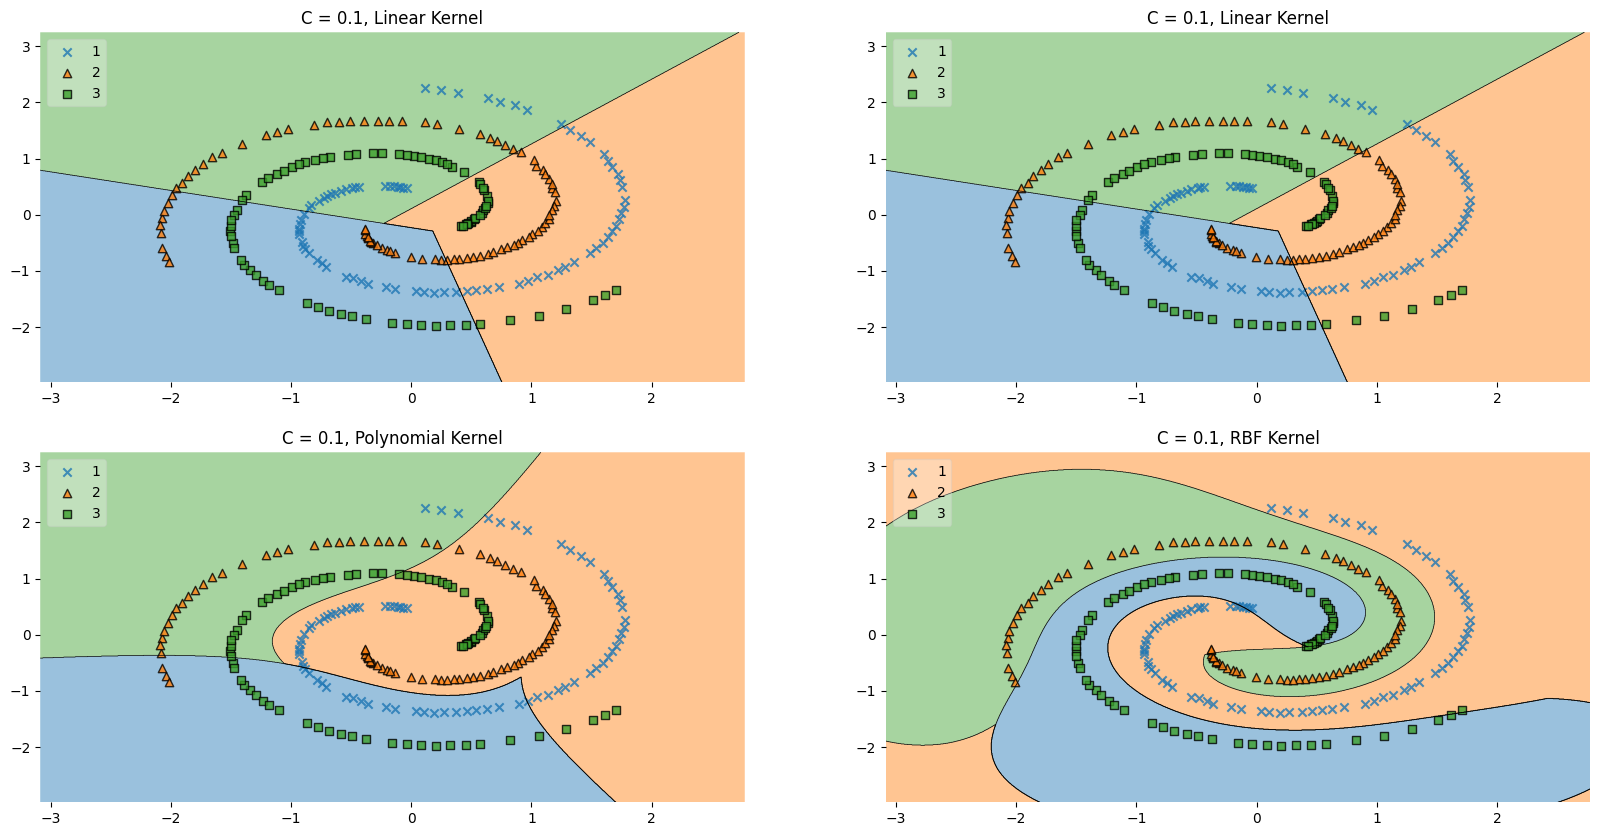

Accuracy for C = 0.1, Linear Kernel: 0.23809523809523808
Accuracy for C = 0.1, Linear Kernel: 0.23809523809523808
Accuracy for C = 0.1, Polynomial Kernel: 0.38095238095238093
Accuracy for C = 0.1, RBF Kernel: 0.9523809523809523


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec
df = pd.read_csv('/content/Spiral.txt', delimiter='\t', skiprows=7)
# Load the data
df.rename(columns={'31.95': 'Feature 1', '7.95': 'Feature 2', '3': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=0.1, kernel='linear')
clf3 = SVC(C=0.1, kernel='poly')
clf4 = SVC(C=1, kernel='rbf')

scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}
labels = ['C = 0.1, Linear Kernel', 'C = 0.1, Linear Kernel', 'C = 0.1, Polynomial Kernel', 'C = 0.1, RBF Kernel']

gs = gridspec.GridSpec(2, 2)

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()
# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 0.1, Linear Kernel'),
               (clf3, 'C = 0.1, Polynomial Kernel'), (clf4, 'C = 0.1, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


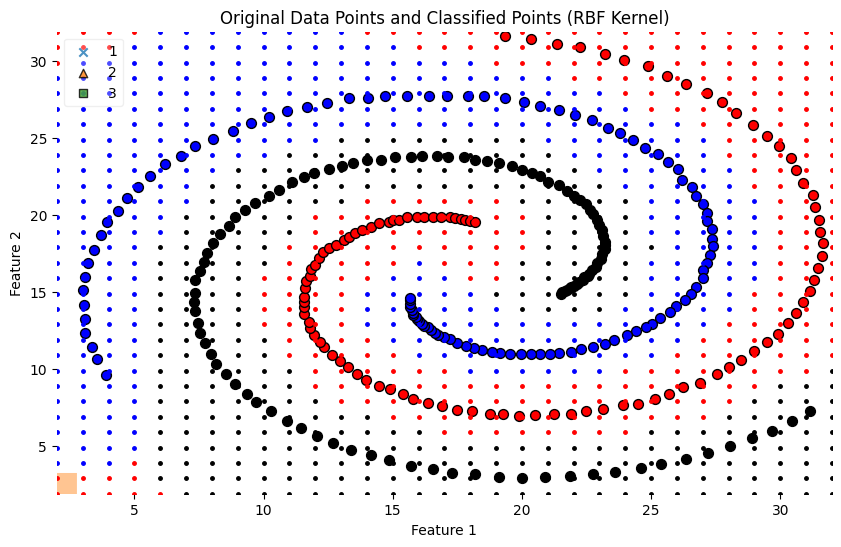

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions  # Import plot_decision_regions from mlxtend

# Load the data
df = pd.read_csv('/content/Spiral.txt', delimiter='\t', skiprows=7)
# Load the data
df.rename(columns={'31.95': 'Feature 1', '7.95': 'Feature 2', '3': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Define the mesh grid with reduced size
step_size = 1  # Adjust this value to reduce the size further if needed
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Reshape the mesh grid to fit the SVM model
mesh_grid = np.c_[xx.ravel(), yy.ravel()]

# Scale the features for the mesh grid
mesh_grid_scaled = scaler.transform(mesh_grid)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=2, C=2)  # You can adjust gamma, coef0, and C as needed
svm_model.fit(X_train_scaled, y_train)

# Predict the class for each point in the mesh grid
Z = svm_model.predict(mesh_grid_scaled)

# Reshape the predictions to match the mesh grid shape
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))

# Plot the decision regions
plot_decision_regions(X=X_train_scaled, y=y_train, clf=svm_model, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 100, 'label': 'Test data'})

# Assign high-contrast colors to different classes
colors = ['red', 'blue', 'black']
color_map = {label: color for label, color in zip(np.unique(y_train), colors)}

# Plot the original data points with bigger size
for idx, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color_map[label], label=f'Class {label}', edgecolors='k', s=50)

# Plot the classified points with different colors
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([[xx[i, j], yy[i, j]]])
        point_scaled = scaler.transform(point)
        prediction = svm_model.predict(point_scaled)
        plt.plot(xx[i, j], yy[i, j], marker='.', markersize=5, c=color_map[prediction[0]])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Original Data Points and Classified Points (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.legend()
plt.show()


# Flame

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

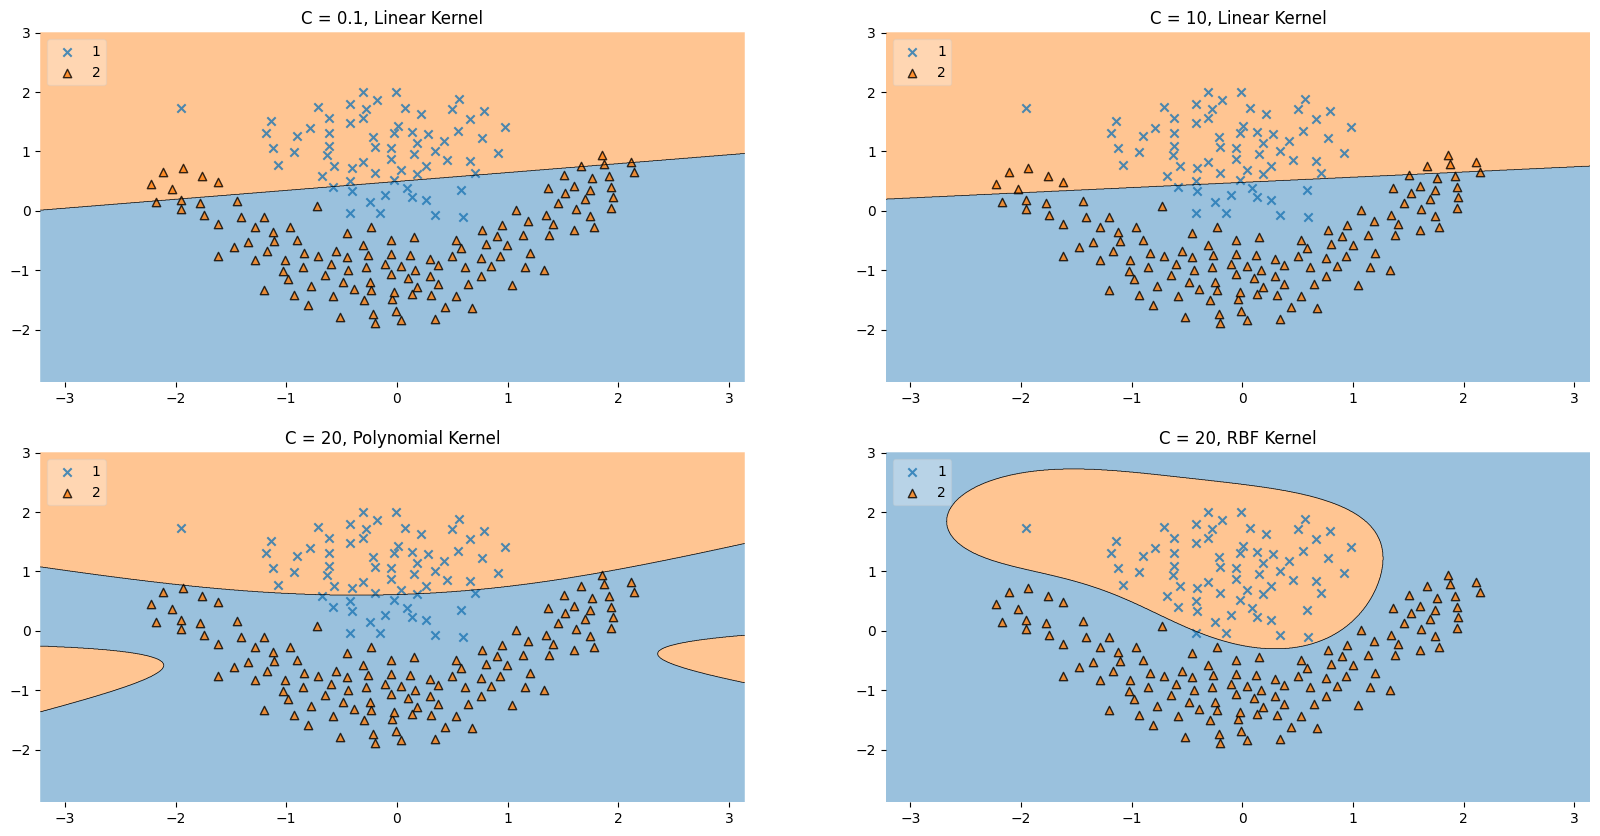

Accuracy for C = 0.1, Linear Kernel: 0.8958333333333334
Accuracy for C = 10, Linear Kernel: 0.9166666666666666
Accuracy for C = 20, Polynomial Kernel: 0.8958333333333334
Accuracy for C = 20, RBF Kernel: 0.9791666666666666


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import itertools
import matplotlib.gridspec as gridspec

# Load the data
df = pd.read_csv('/content/Flame.txt', delimiter='\t', skiprows=7)


df.rename(columns={'1.85': 'Feature 1', '27.8': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)  # You can adjust gamma and C as needed
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Visualize decision boundary and data points with class background
plt.figure(figsize=(20, 10))

# Initialize SVC classifiers with different parameters
clf1 = SVC(C=0.1, kernel='linear')
clf2 = SVC(C=10, kernel='linear')
clf3 = SVC(C=20, kernel='poly')
clf4 = SVC(C=20, kernel='rbf')

# Set scatter_highlight_kwargs for highlighting test data
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

# Define labels for classifiers
labels = ['C = 0.1, Linear Kernel', 'C = 10, Linear Kernel', 'C = 20, Polynomial Kernel', 'C = 20, RBF Kernel']

# Define a grid for subplots
gs = gridspec.GridSpec(2, 2)

# Plot decision regions for each classifier
for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2, markers='x^sv<>', scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title(lab)

plt.show()



# Define the list of classifiers with their corresponding labels
classifiers = [(clf1, 'C = 0.1, Linear Kernel'), (clf2, 'C = 10, Linear Kernel'),
               (clf3, 'C = 20, Polynomial Kernel'), (clf4, 'C = 20, RBF Kernel')]

# Calculate accuracy for each classifier
for clf, label in classifiers:
    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f"Accuracy for {label}: {accuracy}")



/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


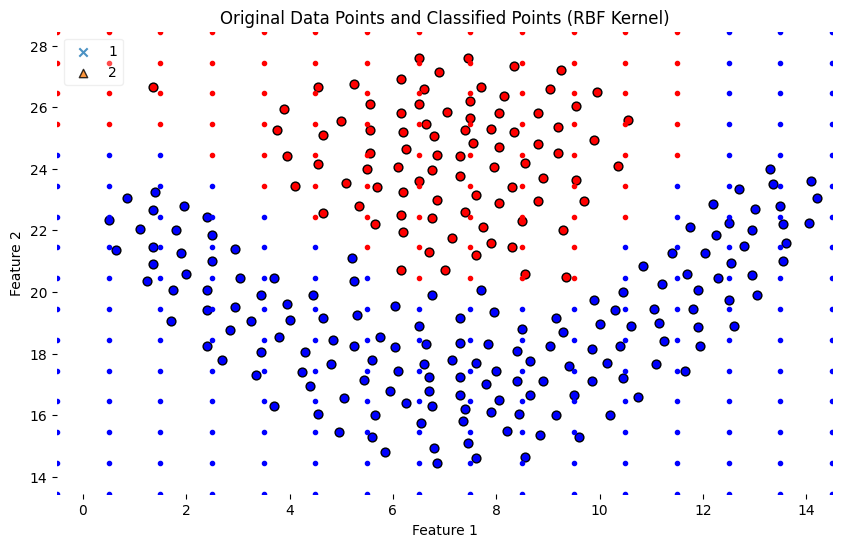

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Load the data
df = pd.read_csv('/content/Flame.txt', delimiter='\t', skiprows=7)


df.rename(columns={'1.85': 'Feature 1', '27.8': 'Feature 2', '1': 'Class'}, inplace=True)

# Extract features and target variable
X = df[['Feature 1', 'Feature 2']].values
y = df['Class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Define the mesh grid with reduced size
step_size = 1  # Adjust this value to reduce the size further if needed
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Reshape the mesh grid to fit the SVM model
mesh_grid = np.c_[xx.ravel(), yy.ravel()]

# Scale the features for the mesh grid
mesh_grid_scaled = scaler.transform(mesh_grid)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=2, C=2)  # You can adjust gamma, coef0, and C as needed
svm_model.fit(X_train_scaled, y_train)

# Predict the class for each point in the mesh grid
Z = svm_model.predict(mesh_grid_scaled)

# Reshape the predictions to match the mesh grid shape
Z = Z.reshape(xx.shape)

# Assign colors to different classes
plt.figure(figsize=(10, 6))
colors = ['red', 'blue']
color_map = {label: color for label, color in zip(np.unique(y_train), colors)}

# Plot decision regions
plot_decision_regions(X=X_train_scaled, y=y_train, clf=svm_model, legend=2, markers='x^sv<>', scatter_highlight_kwargs={'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'})

# Plot original data points
for idx, label in enumerate(np.unique(y)):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color_map[label], label=f'Class {label}', edgecolors='k', s=40)

# Plot classified points with different colors
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([[xx[i, j], yy[i, j]]])
        point_scaled = scaler.transform(point)
        prediction = svm_model.predict(point_scaled)
        plt.plot(xx[i, j], yy[i, j], marker='.', markersize=6, c=color_map[prediction[0]])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Original Data Points and Classified Points (RBF Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
